In [4]:
from ipfml import processing
from ipfml import utils
from PIL import Image
from scipy import signal
from skimage import color
import scipy.stats as stats
import seaborn as sns
import cv2
import numpy as np=
import matplotlib.pyplot as plt
import os

In [49]:
data_folder = "../fichiersSVD_light"

# MSCN analysis on Synthesis Images 

## Utils functions definition

In [58]:
def compute_images_path(scene, prefix, indices):
    images_path = []
    for index in indices:
        path = os.path.join(data_folder, os.path.join(scene, prefix + index + ".png"))
        print(path)
        images_path.append(path)
    return images_path

In [79]:
def display_mscn_distribution(images_path):
    
    images = []
    scene_name = images_path[0].split('/')[2]
    
    # compute mscn coefficients for each image
    for id, path in enumerate(images_path):
        #utils.divide_in_blocks()
        images.append(processing.get_mscn_coefficients(path))

    sns.set(rc={'figure.figsize':(20,15)})
    plt.rc('legend', fontsize=14) 
    plt.rc('axes', titlesize=14) 

    for id, img in enumerate(images):
        h = img.flatten()
        lm = sns.kdeplot(h, bw=.2, label=scene_name + "_" + image_indices[id])
        lm.set_xlim(-0.4, 0.4)
        print(image_indices[id], " => ", np.var(h))
    
    plt.legend();
    plt.savefig(scene_name + '_mscn_distribution.png')

In [108]:
def display_sub_blocks_mscn_variance(images_path, block_size=(200, 200)):
    # study sub blocks variance for each noise level
    images_data = []
    scene_name = images_path[0].split('/')[2]
    
    plt.rc('legend', fontsize=14) 
    plt.rc('axes', titlesize=14) 
    # compute mscn coefficients for each image
    for id, path in enumerate(images_path):
        blocks = processing.divide_in_blocks(Image.open(path), block_size)
    
        data = []
    
        for block in blocks:
            mscn_coeff = processing.get_mscn_coefficients(block)
            data.append(np.var(mscn_coeff))
        
        images_data.append(data)
    
    for id, data in enumerate(images_data):
        data = np.asarray(data)
        indices = data.argsort()[-4:][::-1]
        plt.plot(np.sort(data[indices]), label=scene_name + "_" + image_indices[id])
        print(np.sum(data))
        #lm.set_ylim(0, 0.02)
    
    plt.legend();
    plt.savefig(scene_name + '_sub_blocks_mscn_variance.png')

## Scenes MSCN variance analysis

### Appart01 scene 

In [101]:
scene_name = "Appart1opt02"
prefix_name = "appartAopt_"
image_indices = ["00020", "00050", "00100", "00200", "00300", "00500", "00900"]

In [93]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

../fichiersSVD_light/Appart1opt02/appartAopt_00020.png
../fichiersSVD_light/Appart1opt02/appartAopt_00050.png
../fichiersSVD_light/Appart1opt02/appartAopt_00100.png
../fichiersSVD_light/Appart1opt02/appartAopt_00200.png
../fichiersSVD_light/Appart1opt02/appartAopt_00300.png
../fichiersSVD_light/Appart1opt02/appartAopt_00500.png
../fichiersSVD_light/Appart1opt02/appartAopt_00900.png


00020  =>  0.0013007368923888193
00050  =>  0.0008614542685043583
00100  =>  0.000719609540073056
00200  =>  0.0006473836020377824
00300  =>  0.0006256486440919737
00500  =>  0.0006071633806632832
00900  =>  0.0005957700480215396


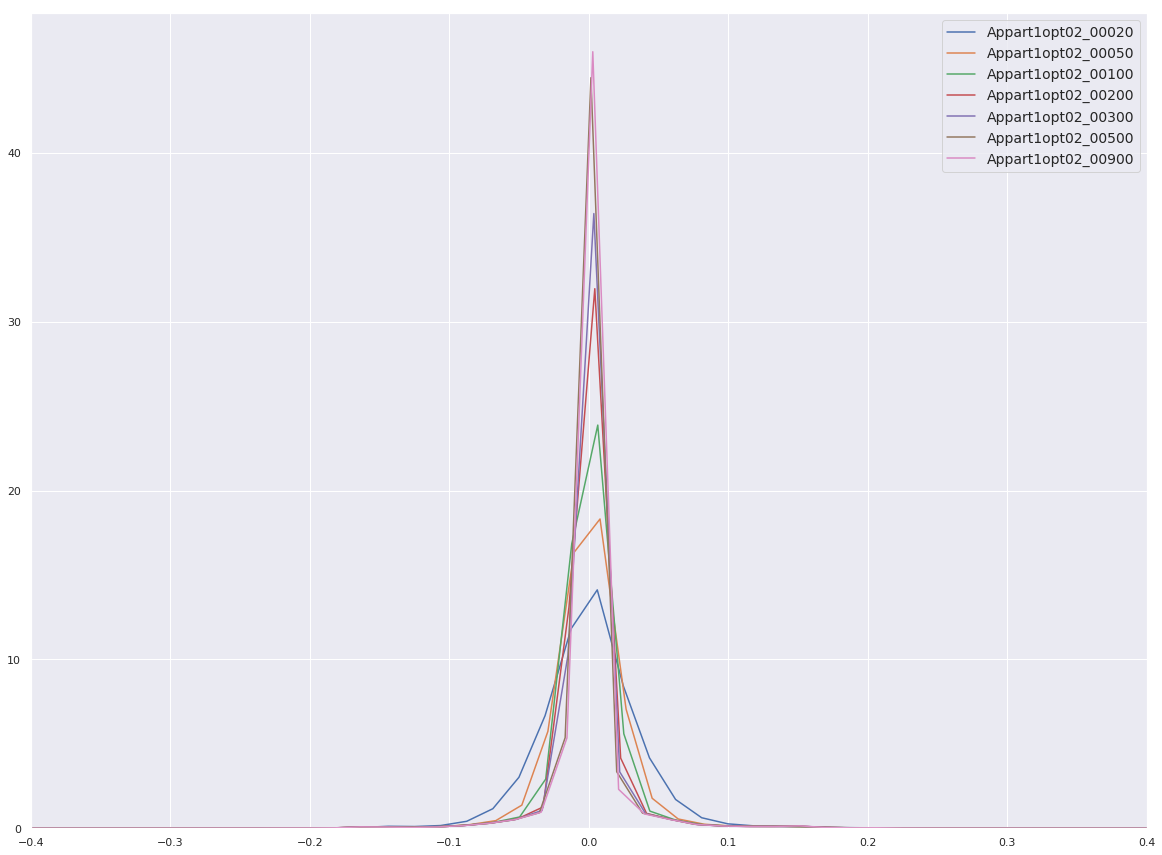

In [82]:
display_mscn_distribution(images_path)

0.029858769841469
0.025388548632194835
0.0236218981403041
0.022487000913283282
0.02209157796963592
0.021781000866678935
0.021454595180229484


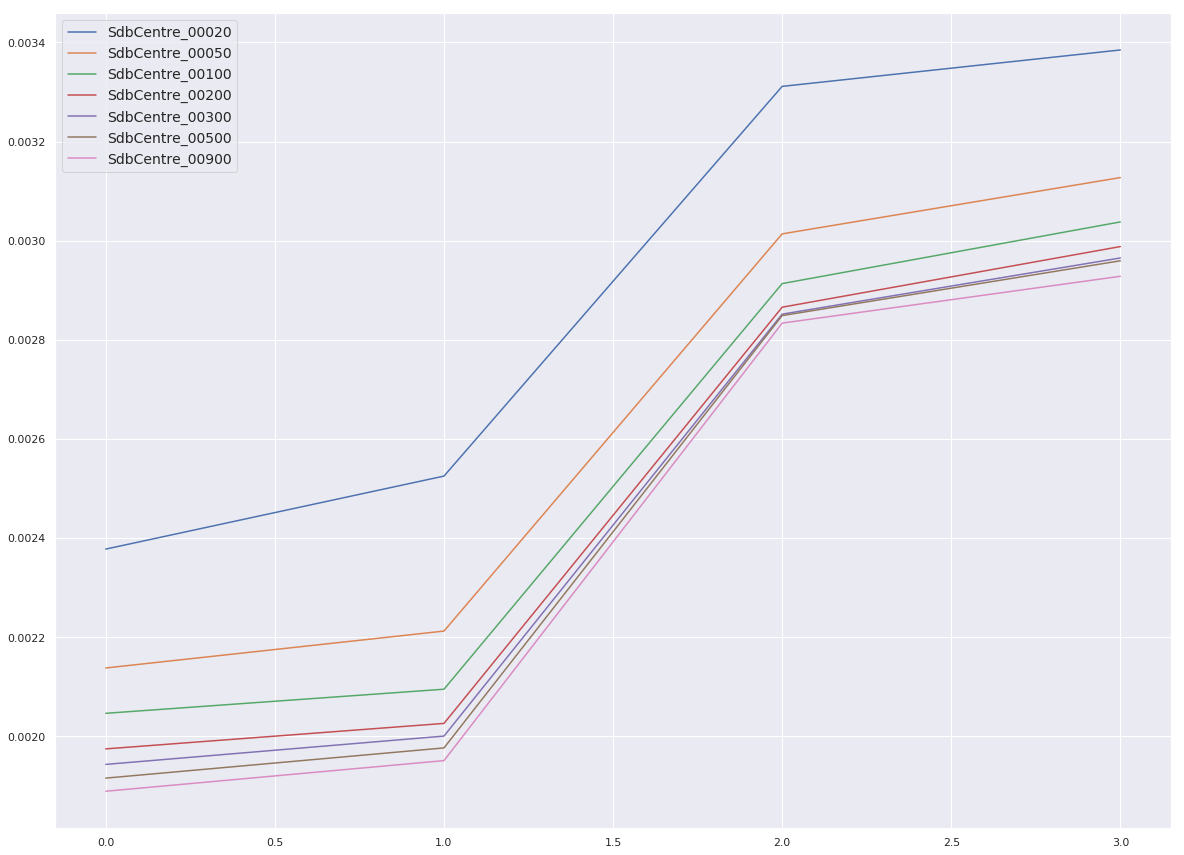

In [109]:
display_sub_blocks_mscn_variance(images_path, (200, 200))

### Cuisine01 analysis

In [110]:
scene_name = "Cuisine01"
prefix_name = "cuisine01_"
image_indices = ["00050", "00100", "00200", "00300", "00500", "00700", "01200"]

In [111]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

../fichiersSVD_light/Cuisine01/cuisine01_00050.png
../fichiersSVD_light/Cuisine01/cuisine01_00100.png
../fichiersSVD_light/Cuisine01/cuisine01_00200.png
../fichiersSVD_light/Cuisine01/cuisine01_00300.png
../fichiersSVD_light/Cuisine01/cuisine01_00500.png
../fichiersSVD_light/Cuisine01/cuisine01_00700.png
../fichiersSVD_light/Cuisine01/cuisine01_01200.png


00050  =>  0.0009676431057037502
00100  =>  0.0008311065862023871
00200  =>  0.0007549075717485793
00300  =>  0.0007261569074363732
00500  =>  0.0007007603214148727
00700  =>  0.0006893560383379428
01200  =>  0.0006775955930850441


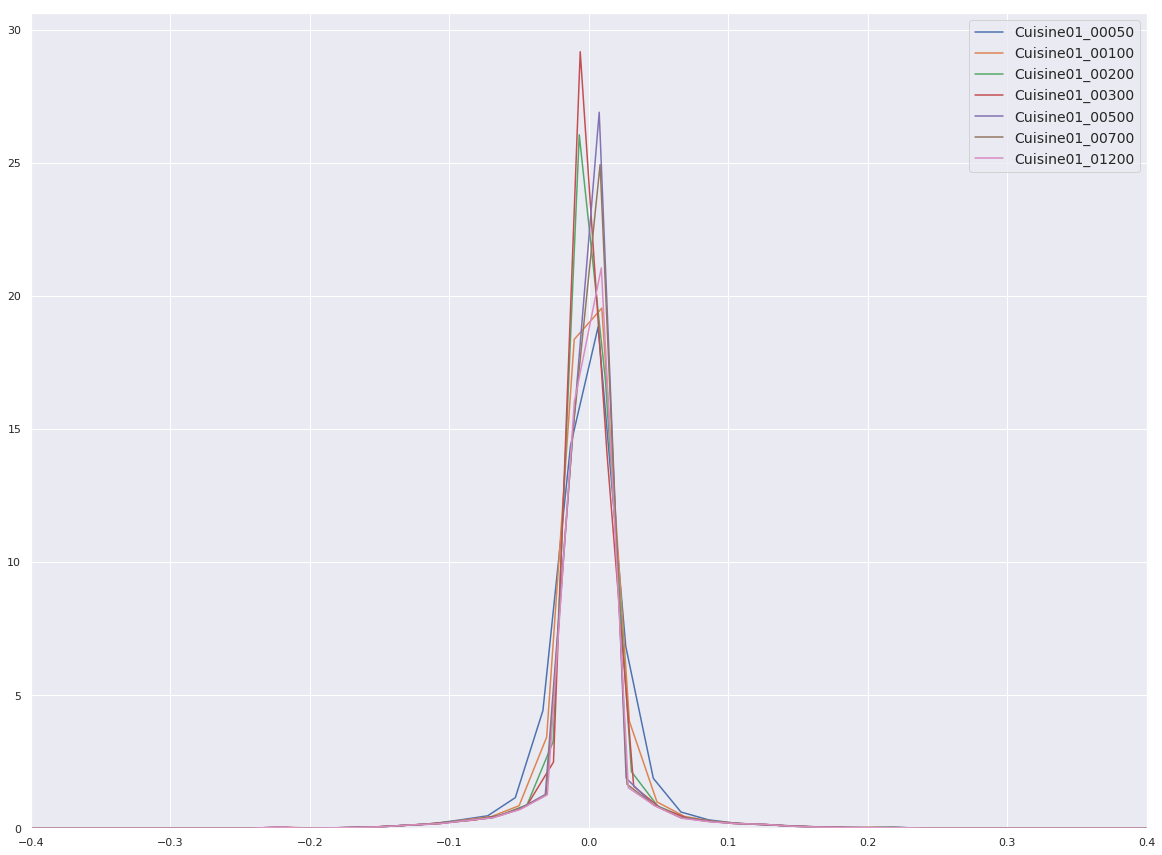

In [89]:
display_mscn_distribution(images_path)

0.019864530267821087
0.01784888777150448
0.016725939339642525
0.01630845135274984
0.015940405284697114
0.01577934050802251
0.015609827896335627


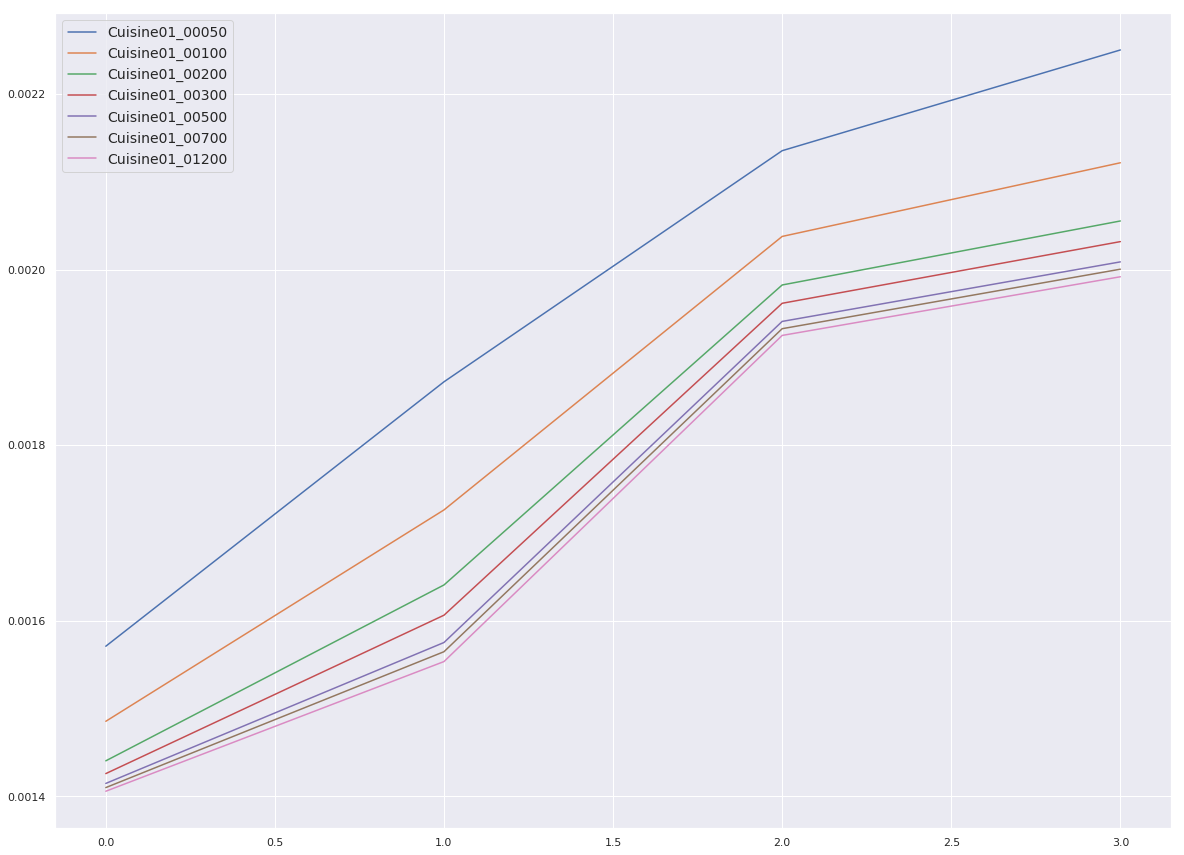

In [112]:
display_sub_blocks_mscn_variance(images_path, (200, 200))

### SdbCentre scene 

In [97]:
scene_name = "SdbCentre"
prefix_name = "SdB2_"
image_indices = ["00020", "00050", "00100", "00200", "00300", "00500", "00950"]

In [98]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

../fichiersSVD_light/SdbCentre/SdB2_00020.png
../fichiersSVD_light/SdbCentre/SdB2_00050.png
../fichiersSVD_light/SdbCentre/SdB2_00100.png
../fichiersSVD_light/SdbCentre/SdB2_00200.png
../fichiersSVD_light/SdbCentre/SdB2_00300.png
../fichiersSVD_light/SdbCentre/SdB2_00500.png
../fichiersSVD_light/SdbCentre/SdB2_00950.png


00020  =>  0.0013007368923888193
00050  =>  0.0008614542685043583
00100  =>  0.000719609540073056
00200  =>  0.0006473836020377824
00300  =>  0.0006256486440919737
00500  =>  0.0006071633806632832
00900  =>  0.0005957700480215396


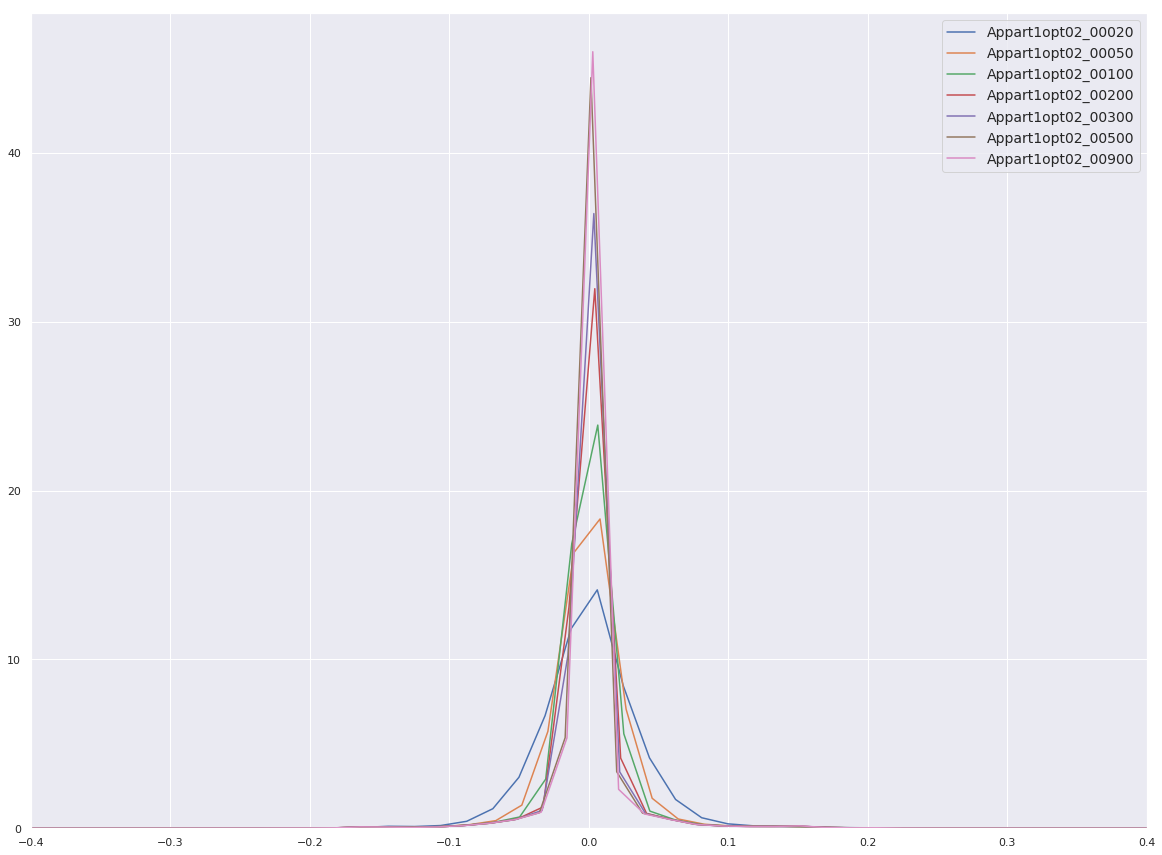

In [84]:
display_mscn_distribution(images_path)

0.029858769841469
0.025388548632194835
0.0236218981403041
0.022487000913283282
0.02209157796963592
0.021781000866678935
0.021454595180229484


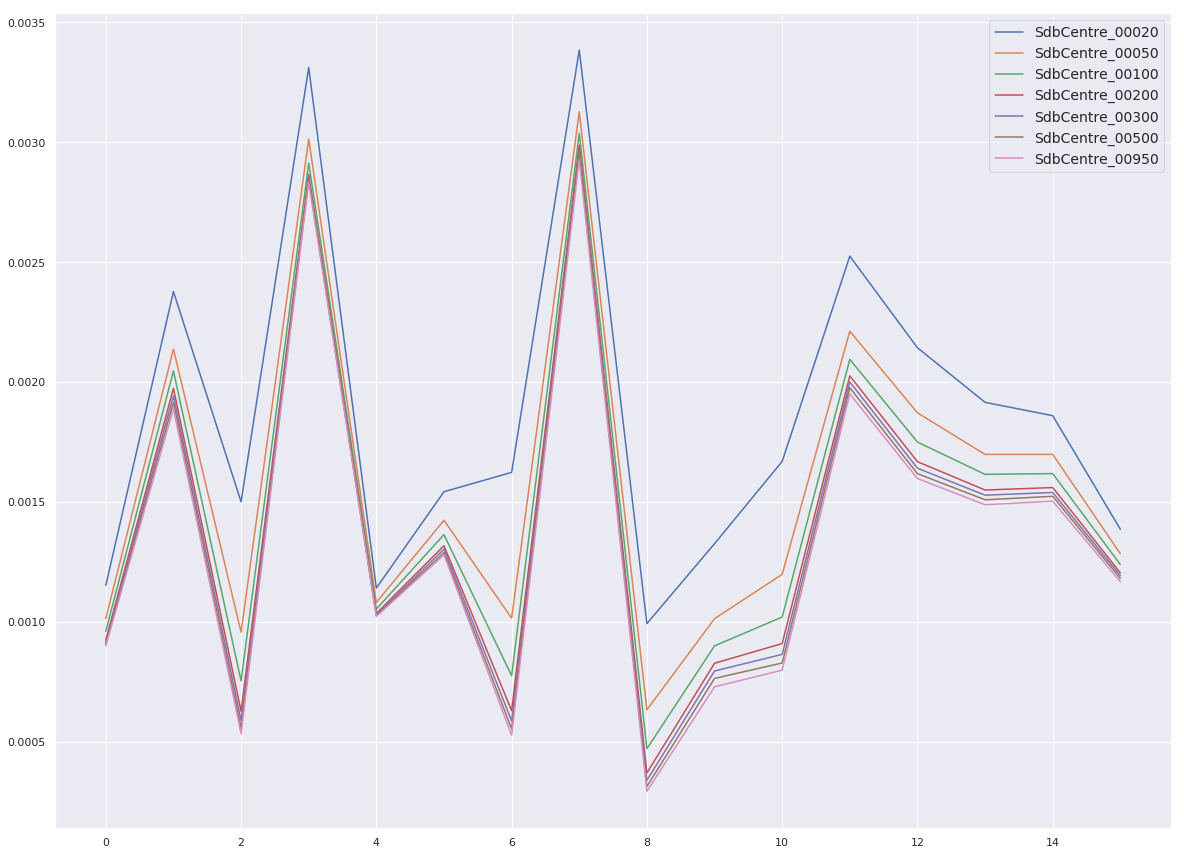

In [99]:
display_sub_blocks_mscn_variance(images_path, (200, 200))